Problem statment:

 Aim of the Project

 The aim of this project is to develop and enhance an online portal, LoanTap, which is dedicated to providing millennials with personalized
 lending packages. LoanTap seeks to bring innovation to the traditional loan market by offering salaried professionals and business owners
 quick and exible loans with affordable conditions. The project aims to streamline the loan process, making it more accessible and appealing
 to the millennial demographic, ultimately improving the user experience and satisfaction.

In [1]:
 !pip install --upgrade scikit-learn
 !pip install missingno

In [ ]:
 #Importing necessary libraries
 import pandas as pd
 import numpy as np
 import seaborn as sns
 from scipy import stats
 import matplotlib.pyplot as plt
 from sklearn.linear_model import LogisticRegression
 from sklearn import metrics
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import classification_report
 from sklearn.metrics import roc_auc_score
 from sklearn.metrics import roc_curve
 from sklearn.metrics import precision_recall_curve
 from sklearn.model_selection import train_test_split, KFold, cross_val_score
 from sklearn.preprocessing import MinMaxScaler
 from yellowbrick.classifier import ROCAUC
 from statsmodels.stats.outliers_influence import variance_inflation_factor
 from imblearn.over_sampling import SMOTE

 Here is the information on this particular data set:

 0. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan
 amount, then it will be re ected in this value.

 1. term : The number of payments on the loan. Values are in months and can be either 36 or 60.

 2. int_rate : Interest Rate on the loan

 3. installment : The monthly payment owed by the borrower if the loan originates.

 4. grade LC : assigned loan grade

 5. sub_grade LC : assigned loan subgrade
 6. emp_title : The job title supplied by the Borrower when applying for the loan.

 7. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or
 more years.
 . home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values
 are: RENT, OWN, MORTGAGE, OTHER
 9. annual_inc : The self-reported annual income provided by the borrower during registration.
 10. veri cation_status : Indicates if income was veri ed by LC, not veri ed, or if the income source was veri ed
 11. issue_d : The month which the loan was funded
 12. loan_status : Current status of the loan
 13. purpose : A category provided by the borrower for the loan request.
 14. title : The loan title provided by the borrower
 15. zip_code : The rst 3 numbers of the zip code provided by the borrower in the loan application.
 1 . addr_state : The state provided by the borrower in the loan application
 17. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the
 requested LC loan, divided by the borrower’s self-reported monthly income.
 1 . earliest_cr_line : The month the borrower's earliest reported credit line was opened
 19. open_acc : The number of open credit lines in the borrower's credit le.
 20. pub_rec : Number of derogatory public records
 21. revol_bal : Total credit revolving balance
 22. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
 23. total_acc : The total number of credit lines currently in the borrower's credit le
 24. initial_list_status : The initial listing status of the loan. Possible values are – W, F
 25. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
 2 . mort_acc : Number of mortgage accounts.
 27. pub_rec_bankruptcies : Number of public record bankruptcies

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data = pd.read_csv('/content/drive/MyDrive/CSV datasets/logistic_regression.csv')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [24]:
 # Shape of the dataset
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  396030
No. of columns:  27


In [23]:
# Checking the distribution of outcome labels
data.loan_status.value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,80.387092
Charged Off,19.612908


In [25]:
 # Statistical summary of the dataset
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [78]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'zip_code_05113',
       'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723',
       'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_OTHER', 'home_ownership_OWN', 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

 A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data
 from usually a monochromatic scale. The values of the rst dimension appear as the rows of the table while of the second dimension as a
 column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation
 heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A
 correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.


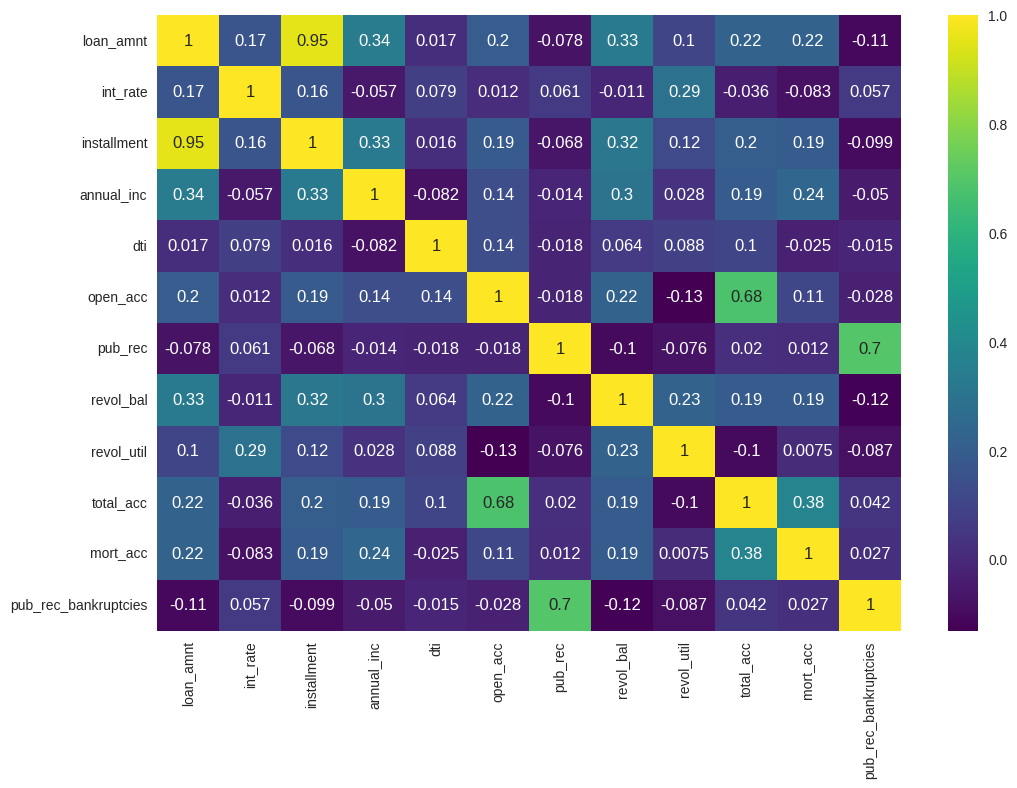

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(method='pearson'), annot=True, cmap='viridis')
plt.show()

 We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

 installment: The monthly payment owed by the borrower if the loan originates.

 loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan
 amount, then it will be re ected in this value.
 So, we can drop either one of those columns

# Data Exploration

In [30]:
 data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The no of people those who have fully paid are 318357 and that of Charged Off are 77673

In [31]:
 data['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


The majority of people have home ownership as Mortgage and Rent

In [32]:
 data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
 data.home_ownership.value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


Combininging the minority classes as 'OTHER'.

In [33]:
data['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


In [34]:
# Checking the distribution of 'Other'
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,123
Charged Off,23


4. Coverting string to date-time format

In [36]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

<ipython-input-36-2f9ecc54f8c2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
<ipython-input-36-2f9ecc54f8c2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [37]:
data['title'].value_counts()[:20]

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
Major purchase,4769
Consolidation,3852
debt consolidation,3547
Business,2949


In [38]:
 data['title'] = data.title.str.lower()

In [39]:
 data.title.value_counts()[:10]

,count
title,
debt consolidation,168108
credit card refinancing,51781
home improvement,17117
other,12993
consolidation,5583
major purchase,4998
debt consolidation loan,3513
business,3017
medical expenses,2820


 The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

 So from where we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan

<ipython-input-40-e376c4a46952>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'A1'),
 Text(1, 0, 'A2'),
 Text(2, 0, 'A3'),
 Text(3, 0, 'A4'),
 Text(4, 0, 'A5'),
 Text(5, 0, 'B1'),
 Text(6, 0, 'B2'),
 Text(7, 0, 'B3'),
 Text(8, 0, 'B4'),
 Text(9, 0, 'B5'),
 Text(10, 0, 'C1'),
 Text(11, 0, 'C2'),
 Text(12, 0, 'C3'),
 Text(13, 0, 'C4'),
 Text(14, 0, 'C5'),
 Text(15, 0, 'D1'),
 Text(16, 0, 'D2'),
 Text(17, 0, 'D3'),
 Text(18, 0, 'D4'),
 Text(19, 0, 'D5'),
 Text(20, 0, 'E1'),
 Text(21, 0, 'E2'),
 Text(22, 0, 'E3'),
 Text(23, 0, 'E4'),
 Text(24, 0, 'E5'),
 Text(25, 0, 'F1'),
 Text(26, 0, 'F2'),
 Text(27, 0, 'F3'),
 Text(28, 0, 'F4'),
 Text(29, 0, 'F5'),
 Text(30, 0, 'G1'),
 Text(31, 0, 'G2'),
 Text(32, 0, 'G3'),
 Text(33, 0, 'G4'),
 Text(34, 0, 'G5')]

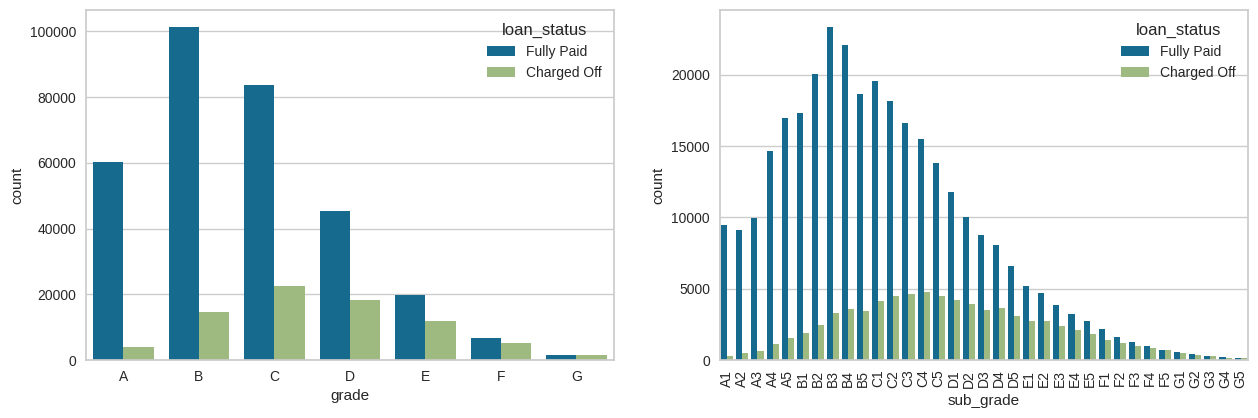

In [40]:
 plt.figure(figsize=(15, 10))
 plt.subplot(2, 2, 1)
 grade = sorted(data.grade.unique().tolist())
 sns.countplot(x='grade', data=data, hue='loan_status', order=grade)
 plt.subplot(2, 2, 2)
 sub_grade = sorted(data.sub_grade.unique().tolist())
 g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
 g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-41-9fd3c7705aaa>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

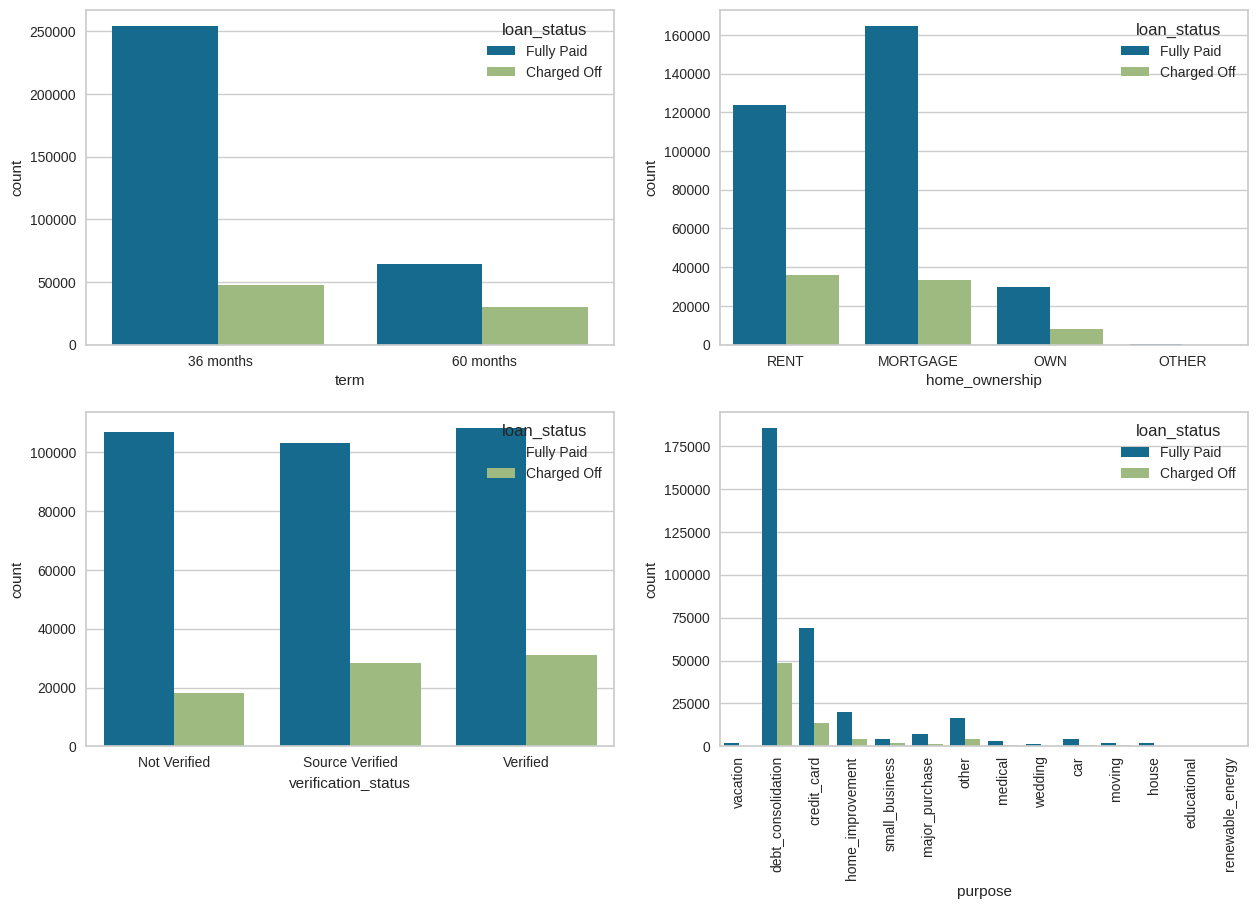

In [41]:
 plt.figure(figsize=(15, 20))
 plt.subplot(4, 2, 1)
 sns.countplot(x='term', data=data, hue='loan_status')
 plt.subplot(4, 2, 2)
 sns.countplot(x='home_ownership', data=data, hue='loan_status')
 plt.subplot(4, 2, 3)
 sns.countplot(x='verification_status', data=data, hue='loan_status')
 plt.subplot(4, 2, 4)
 g = sns.countplot(x='purpose', data=data, hue='loan_status')
 g.set_xticklabels(g.get_xticklabels(), rotation=90)

<ipython-input-42-4ef9e4833dc9>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


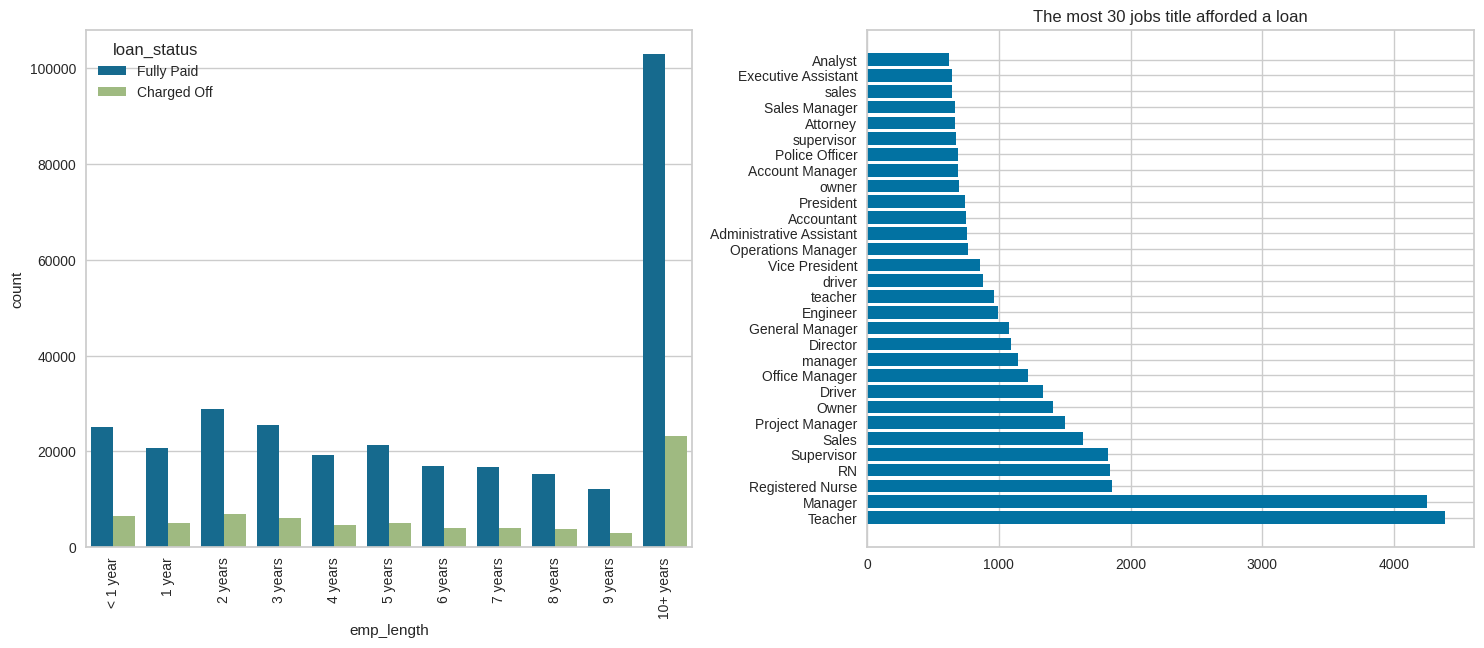

In [42]:
 plt.figure(figsize=(15, 12))
 plt.subplot(2, 2, 1)
 order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
 '6 years', '7 years', '8 years', '9 years', '10+ years',]
 g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
 g.set_xticklabels(g.get_xticklabels(), rotation=90);
 plt.subplot(2, 2, 2)
 plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
 plt.title("The most 30 jobs title afforded a loan")
 plt.tight_layout()

 Manager and Teacher are the most afforded loan job titles.

# Feature Engineering

In [43]:
 def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
 def mort_acc(number):
    if number == 0.0:
        return 0
    else:
        return 1
 def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    else:
        return 1

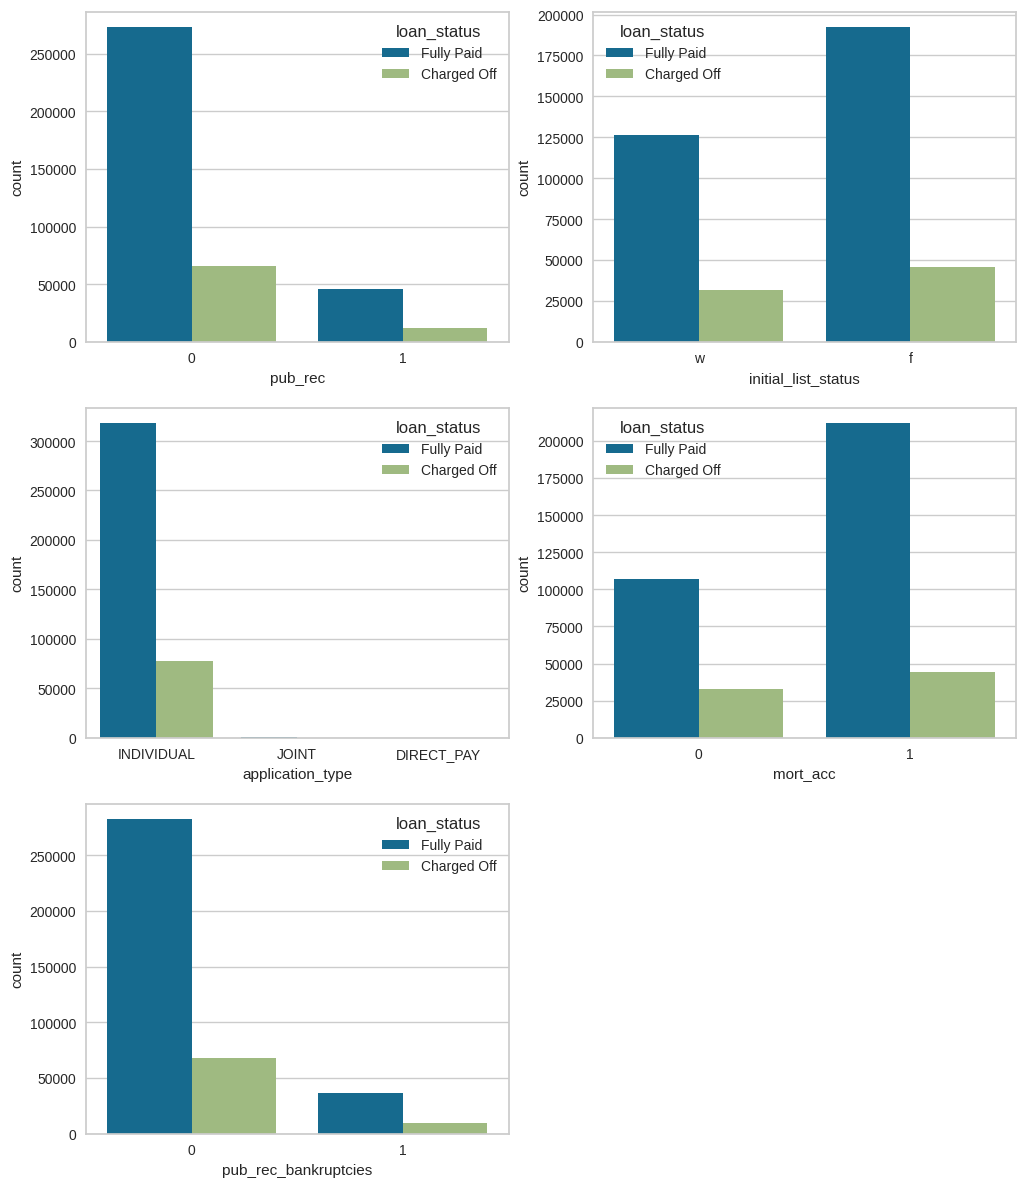

In [44]:
 data['pub_rec'] = data.pub_rec.apply(pub_rec)
 data['mort_acc'] = data.mort_acc.apply(mort_acc)
 data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
 plt.figure(figsize=(12, 30))
 plt.subplot(6, 2, 1)
 sns.countplot(x='pub_rec', data=data, hue='loan_status')
 plt.subplot(6, 2, 2)
 sns.countplot(x='initial_list_status', data=data, hue='loan_status')
 plt.subplot(6, 2, 3)
 sns.countplot(x='application_type', data=data, hue='loan_status')
 plt.subplot(6, 2, 4)
 sns.countplot(x='mort_acc', data=data, hue='loan_status')
 plt.subplot(6, 2, 5)
 sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')
 plt.show()

In [45]:
# Mapping of target variable
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [46]:
 data.isnull().sum()/len(data)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


Very Important: Mean Target Imputation

In [48]:
data.groupby(by='total_acc').mean(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,0.222222,2.279444,1.611111,0.000000,2860.166667,53.527778,0.111111,0.111111
3.0,6042.966361,15.615566,198.728318,41270.753884,0.220183,6.502813,2.611621,0.033639,3382.807339,49.991022,0.495413,0.027523
4.0,7587.399031,15.069491,250.050194,42426.565969,0.214055,8.411963,3.324717,0.033118,4874.231826,58.477400,0.341680,0.033926
5.0,7845.734714,14.917564,256.190325,44394.098003,0.203156,10.118328,3.921598,0.055720,5475.253452,56.890311,0.318540,0.044872
6.0,8529.019843,14.651752,278.518228,48470.001156,0.215874,11.222542,4.511119,0.076634,6546.374957,57.812483,0.303113,0.056791
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,1.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,0.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,0.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,1.000000,0.000000


In [50]:
total_acc_avg = data.groupby(by='total_acc')['mort_acc'].mean()
# Saving mean of mort_acc according to total_acc_avg
# Specifying 'mort_acc' column ensures only numeric data is used for calculating the mean.

In [53]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
data.isnull().sum()/len(data)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [54]:
# Current no. of rows
data.shape

(396030, 27)

In [55]:
 # Dropping rows with null values
data.dropna(inplace=True)

In [56]:
 # Remaining no. of rows
data.shape

(371125, 27)

In [57]:
 numerical_data = data.select_dtypes(include='number')
 num_cols = numerical_data.columns
 len(num_cols)

13

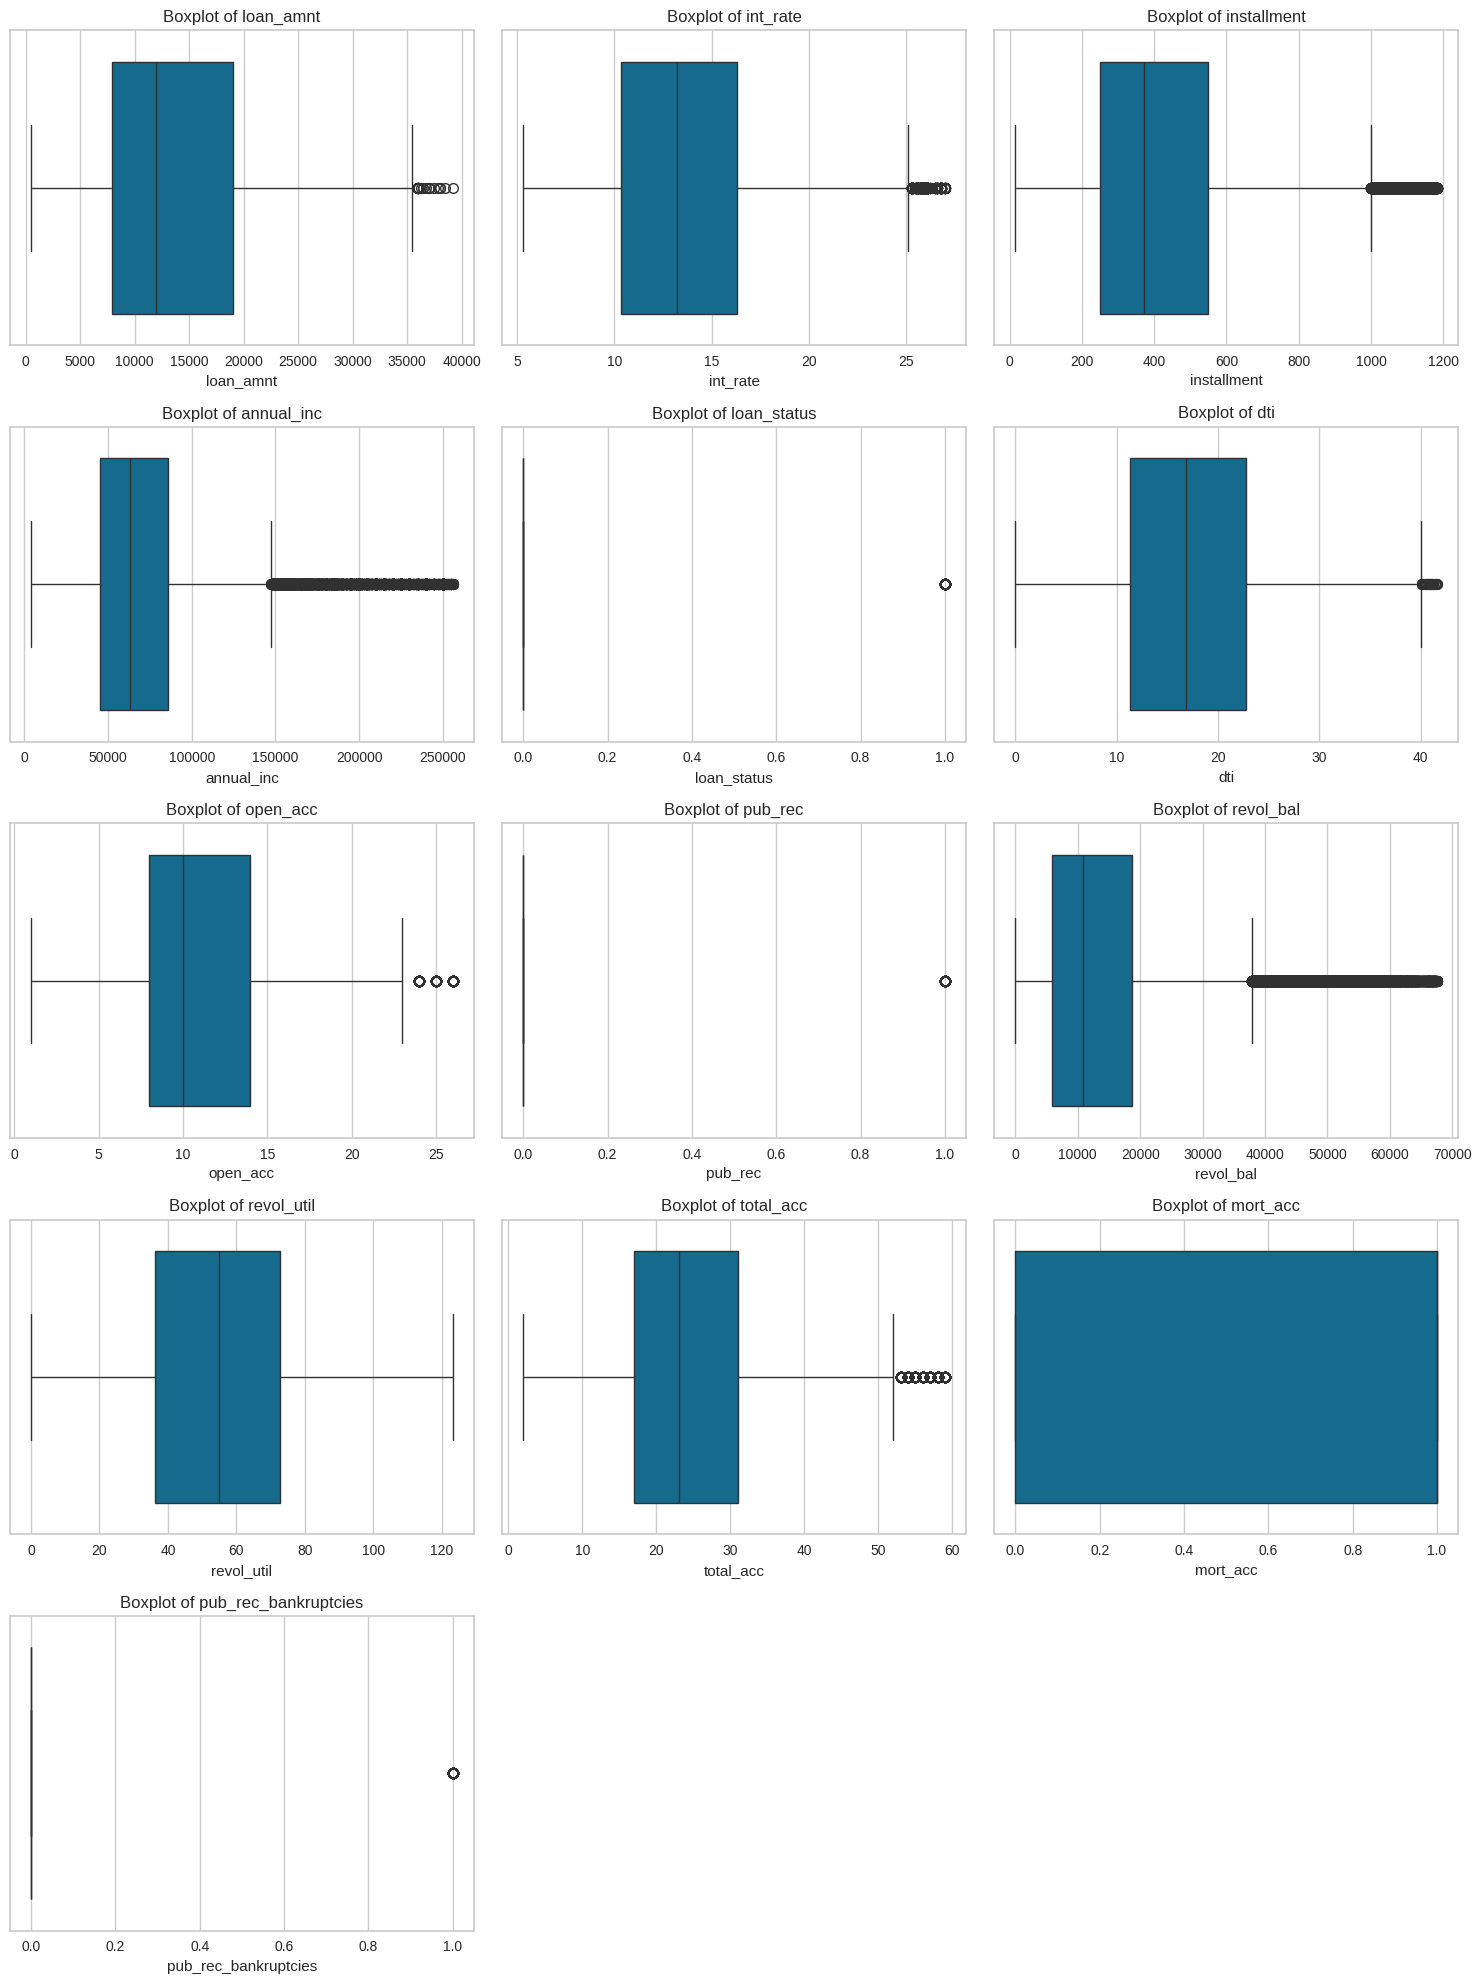

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for subplots
num_features = len(num_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_features / cols)  # Determine required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through numerical columns and plot boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [61]:
for col in num_cols:
 mean = data[col].mean()
 std = data[col].std()
 upper_limit = mean+3*std
 lower_limit = mean-3*std

 data = data[(data[col]<upper_limit) & (data[col]>lower_limit)]
 data.shape

# Data Preprocessing

In [67]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [68]:
 term_values = {' 36 months': 36, ' 60 months': 60}
 data['term'] = data.term.map(term_values)

In [69]:
 # Initial List Status
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [70]:
 # Let's fetch ZIP from address and then drop the remaining details
data['zip_code'] = data.address.apply(lambda x: x[-5:])
data['zip_code'].value_counts(normalize=True)*100

,proportion
zip_code,
70466,14.372118
30723,14.294876
22690,14.272929
48052,14.125001
00813,11.607942
29597,11.548942
05113,11.519299
93700,2.767596
11650,2.761040


In [71]:
 # Dropping some variables which IMO we can let go for now
data.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

One-hot Encoding

In [72]:
 dummies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
 data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,w,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,f,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,f,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,f,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,f,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [74]:
 data.shape

(350846, 50)

# Logistic Regression model building

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

Accuracy: 0.8911
Precision: 0.9502
Recall: 0.4568
F1 Score: 0.6170
ROC AUC Score: 0.9055

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     56692
           1       0.95      0.46      0.62     13478

    accuracy                           0.89     70170
   macro avg       0.92      0.73      0.78     70170
weighted avg       0.90      0.89      0.88     70170



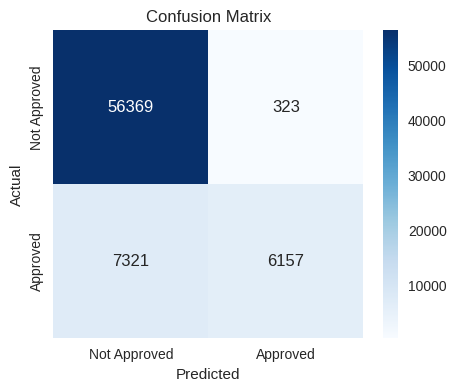

In [83]:
# Step 1: Identify Numerical and Categorical Features
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Encode Categorical Features using OneHotEncoding
if categorical_cols:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Convert to numeric

# Step 3: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Standardize Only Numerical Features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 5: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Model Performance Summary**  

1️⃣ **High Overall Accuracy (89.11%)**  
   - The model correctly predicts 89.11% of loan statuses.  
   - However, accuracy can be misleading in imbalanced datasets.  

2️⃣ **Strong Precision for Defaults (95.02%)**  
   - When predicting defaults (1), the model is correct 95.02% of the time.  
   - Few false positives, minimizing unnecessary loan rejections.  

3️⃣ **Low Recall for Defaults (45.68%)**  
   - The model captures only 45.68% of actual defaults.  
   - High miss rate may lead to financial losses.  

4️⃣ **Moderate F1-Score (61.70%)**  
   - Balances precision and recall but remains moderate due to low recall.  
   - Model prioritizes precision over capturing all defaults.  

5️⃣ **Good ROC-AUC (90.55%)**  
   - Strong ability to distinguish defaulters from non-defaulters.  
   - Does not directly address the recall issue.  

6️⃣ **Impact of Class Imbalance**  
   - Dataset: 56,692 non-defaults (0) vs. 13,478 defaults (1).  
   - Model favors majority class (0), reducing recall for defaults.

Recommendations to Improve Model Performance

🔹 Handle Class Imbalance

Use class_weight='balanced' in LogisticRegression().
Try oversampling (SMOTE) or undersampling to balance the classes.

🔹 Optimize for Recall

Adjust the decision threshold to favor recall instead of precision.
Tune the model to increase recall while keeping precision at an acceptable level.

🔹 Try Advanced Models

Logistic Regression may not be capturing complex relationships.
Test Random Forest, XGBoost, or Neural Networks for better recall.